In [1]:
import pandas as pd
import numpy as np

from itertools import product
from custom_functions import custom_accuracy_score, custom_confusion_matrix, custom_classification_report

In [2]:
# Load the training dataset
train_csv_path = './archive/sign_mnist_train.csv'
train_data = pd.read_csv(train_csv_path)

# Load the testing dataset
test_csv_path = './archive/sign_mnist_test.csv'
test_data = pd.read_csv(test_csv_path)

In [3]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, num_classes=None):
        """
        Initialize the Logistic Regression model
        
        Parameters:
        - learning_rate: step size for gradient descent
        - num_iterations: number of training iterations
        - num_classes: number of unique classes in the dataset
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.num_classes = num_classes
        self.weights = None
        self.bias = None
        self.class_mapping = None  # To handle zero-based indexing

    def _softmax(self, z):
        """
        Softmax activation function for multiclass classification
        Prevents numerical instability by subtracting max value
        
        Parameters:
        - z: input array of logits
        
        Returns:
        - Softmax probabilities
        """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _one_hot_encode(self, y):
        """
        Convert labels to one-hot encoded format
        
        Parameters:
        - y: original labels
        
        Returns:
        - One-hot encoded labels
        """
        # Remap labels to zero-based index if needed
        if self.class_mapping is None:
            unique_classes = np.unique(y)
            self.class_mapping = {orig: idx for idx, orig in enumerate(unique_classes)}
            self.reverse_mapping = {idx: orig for orig, idx in self.class_mapping.items()}
        
        # Map original labels to zero-based index
        y_mapped = np.array([self.class_mapping[label] for label in y])
        
        # Create one-hot encoding
        one_hot = np.zeros((y.shape[0], self.num_classes))
        one_hot[np.arange(y.shape[0]), y_mapped] = 1
        return one_hot

    def fit(self, X, y):
        """
        Train the logistic regression model
        
        Parameters:
        - X: input features (num_samples, num_features)
        - y: target labels
        """
        # Determine number of classes if not specified
        unique_classes = np.unique(y)
        self.num_classes = len(unique_classes)
        
        # Initialize weights and bias
        num_features = X.shape[1]
        self.weights = np.zeros((num_features, self.num_classes))
        self.bias = np.zeros((1, self.num_classes))
        
        # One-hot encode labels
        Y_one_hot = self._one_hot_encode(y)
        
        # Gradient descent
        for _ in range(self.num_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)
            
            # Compute gradients
            dw = (1/X.shape[0]) * np.dot(X.T, (y_predicted - Y_one_hot))
            db = (1/X.shape[0]) * np.sum(y_predicted - Y_one_hot, axis=0, keepdims=True)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Make predictions on input data
        
        Parameters:
        - X: input features
        
        Returns:
        - Predicted class labels (original class labels)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        
        # Get indices of max probabilities
        predicted_indices = np.argmax(y_predicted, axis=1)
        
        # Map back to original class labels
        return np.array([self.reverse_mapping[idx] for idx in predicted_indices])

    def predict_proba(self, X):
        """
        Predict class probabilities
        
        Parameters:
        - X: input features
        
        Returns:
        - Predicted class probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self._softmax(linear_model)

    def accuracy(self, X, y):
        """
        Compute model accuracy
        
        Parameters:
        - X: input features
        - y: true labels
        
        Returns:
        - Accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

def preprocess_sign_mnist(train_data, test_data):
    """
    Preprocess Sign MNIST dataset
    
    Parameters:
    - train_data: Training dataframe
    - test_data: Testing dataframe
    
    Returns:
    - Preprocessed X_train, X_test, y_train, y_test
    """
    # Separate features and labels
    X_train = train_data.drop('label', axis=1).values
    y_train = train_data['label'].values
    
    X_test = test_data.drop('label', axis=1).values
    y_test = test_data['label'].values
    
    # Normalize pixel values to [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    print("Unique training classes:", np.unique(y_train))
    print("Unique testing classes:", np.unique(y_test))
    
    return X_train, X_test, y_train, y_test

def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Train custom Logistic Regression on Sign MNIST
    
    Parameters:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training labels
    - y_test: Testing labels
    
    Returns:
    - Trained model
    - Training and test accuracies
    """
    # Create and train the model
    clf = CustomLogisticRegression(
        learning_rate=0.1,  # You can tune this
        num_iterations=1000,  # You can increase for better convergence
        num_classes=len(np.unique(y_train))
    )
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Compute accuracies
    train_accuracy = clf.accuracy(X_train, y_train)
    test_accuracy = clf.accuracy(X_test, y_test)
    
    return clf, train_accuracy, test_accuracy

In [5]:
def preprocess_sign_mnist(train_data, test_data):
    # Separate features and labels
    X_train = train_data.drop('label', axis=1).values
    y_train = train_data['label'].values

    print(X_train[0])
    
    X_test = test_data.drop('label', axis=1).values
    y_test = test_data['label'].values
    
    # Normalize pixel values to [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    print("Unique training classes:", np.unique(y_train))
    print("Unique testing classes:", np.unique(y_test))
    
    return X_train, X_test, y_train, y_test

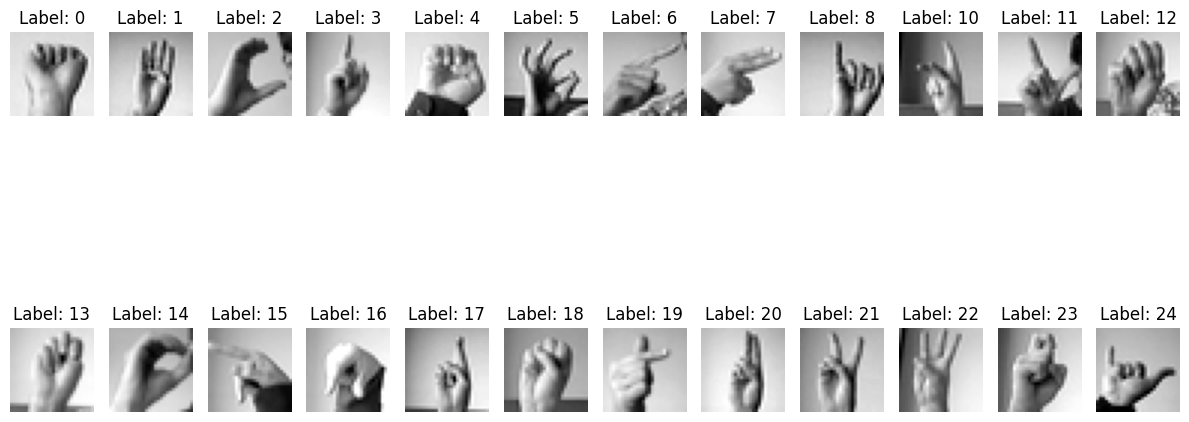

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_unique_images(X_data, y_data, num_classes=10):
    """
    Plot unique images for each class with its label.
    
    Parameters:
    - X_data: Feature matrix (images), shape (num_samples, num_features)
    - y_data: Labels corresponding to X_data, shape (num_samples,)
    - num_classes: Number of unique classes (default: 10)
    """
    unique_classes = np.unique(y_data)
    plt.figure(figsize=(12, 8))
    
    for i, cls in enumerate(unique_classes):
        # Find the first image corresponding to the current class
        index = np.where(y_data == cls)[0][0]
        image = X_data[index].reshape(28, 28)  # Assuming images are 28x28 pixels
        
        # Plot the image
        plt.subplot(2, (num_classes + 1) // 2, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {cls}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot unique images and their labels
plot_unique_images(X_train, y_train, num_classes=len(np.unique(y_train)))


In [7]:
# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_sign_mnist(train_data, test_data)
print(X_train[0])

[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
 170 171 171 171 172 171 171 170 170 169 111 121 129 135 141 144 148 151
 154 157 160 163 164 170 119 152 171 171 170 171 172 172 172 172 172 171
 171 170 113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142
 170 171 171 171 172 172 173 173 172 171 171 171 116 125 133 139 143 146
 151 153 156 159 162 163 167 167  95 144 171 172 172 172 172 172 173 173
 173 172 172 171 117 126 134 140 145 149 153 156 158 161 163 164 175 156
  87 154 172 173 173 173 173 173 174 174 174 173 172 172 119 128 136 142
 146 150 153 156 159 163 165 164 184 148  89 164 172 174 174 174 174 175
 175 174 175 174 173 173 122 130 138 143 147 150 154 158 162 165 166 172
 181 128  94 170 173 175 174 175 176 177 177 177 177 175 175 174 122 132
 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178 178 179
 179 179 179 178 179 177 175 174 125 134 141 147 150 153 157 161 164 167
 168 184 179 116 126 165 176 179 180 180 181 180 18

In [14]:
# Create and train the model
clf = CustomLogisticRegression(
    learning_rate=0.1, 
    num_iterations=1000,  
    num_classes=len(np.unique(y_train))
)

# Fit the model
clf.fit(X_train, y_train)

In [7]:
# Compute accuracies
train_accuracy = clf.accuracy(X_train, y_train)
test_accuracy = clf.accuracy(X_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 76.39%
Testing Accuracy: 63.43%


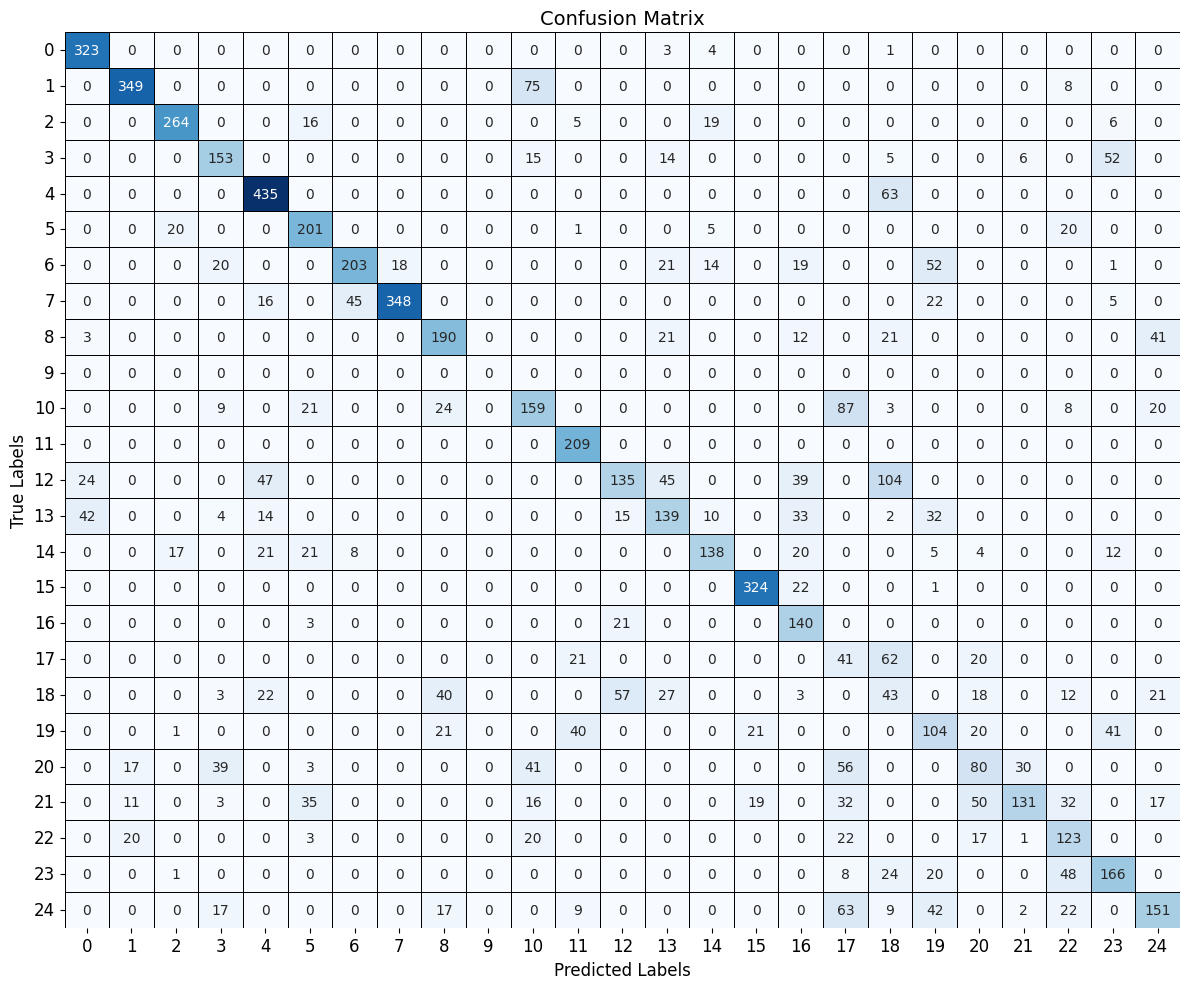


Classification Report:


IndexError: index 24 is out of bounds for axis 0 with size 24

In [8]:
# Predictions
y_pred = clf.predict(X_test)
num_classes = max(np.max(y_train), np.max(y_test)) + 1

# Confusion Matrix
conf_matrix = custom_confusion_matrix(y_true=y_test, y_pred=y_pred, num_classes=num_classes)

# Classification Report
print("\nClassification Report:")
custom_classification_report(y_test, y_pred, num_classes=len(np.unique(y_train)))


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Path to the folder containing the images
image_directory = './archive/validation_images'
output_csv = './archive/validation_images/validation.csv'

# List to store image data
image_data = []

# Iterate through each image file in the directory
for file_name in os.listdir(image_directory):
    if file_name.endswith('.png'):  # Only process PNG files
        image_path = os.path.join(image_directory, file_name)
        # Open the image and convert it to grayscale
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        # Convert image to numpy array and flatten it
        img_array = np.array(img).flatten()  # Flatten to 1D array
        # Append the filename as the first column and the pixel values
        image_data.append([file_name] + img_array.tolist())

# Create a DataFrame with the image data
df = pd.DataFrame(image_data)

# Save the DataFrame to a CSV file
df.to_csv(output_csv, index=False, header=False)

print(f"Pixel values saved to {output_csv}")


In [ ]:
# Load the training dataset
validation_csv_path = './archive/validation_images/validation.csv'
validation_data = pd.read_csv(validation_csv_path)

In [11]:
from PIL import Image
# Open the image
img = Image.open('./archive/validation_images/IMG_7865.png')

# Ensure the image is in RGB or grayscale mode
img = img.convert("RGB")

# Resize the image to 28x28
img_resized = img.resize((28, 28))

# Convert the resized image to a NumPy array
img_array = np.array(img_resized) / 255.0  # Normalize

# Flatten the image array to shape (1, 784)
x = img_array.reshape(-1, 784)
x

array([[0.72156863, 0.65098039, 0.55294118, ..., 0.05490196, 0.08627451,
        0.22352941],
       [0.13333333, 0.15686275, 0.39215686, ..., 0.63529412, 0.81960784,
        0.61568627],
       [0.6       , 0.75686275, 0.55294118, ..., 0.70588235, 0.62745098,
        0.53333333]])

In [12]:
from PIL import Image
import numpy as np

def preprocess_image(image_path, img_size=(28, 28)):
    """
    Preprocess a single image for prediction.

    Parameters:
    - image_path: Path to the image file
    - img_size: Target size for the image (default: 28x28)

    Returns:
    - Preprocessed image as a NumPy array
    """
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize the image
    img_resized = img.resize(img_size)

    # Convert to NumPy array and normalize
    img_array = np.array(img_resized, dtype='float32') / 255.0

    # Flatten the image to a 1D array
    img_flattened = img_array.flatten()

    # Add batch dimension (1, num_features)
    return img_flattened.reshape(1, -1)

def predict_image(model, image_path):
    """
    Predict the class of a single image using the trained model.

    Parameters:
    - model: Trained CustomLogisticRegression model
    - image_path: Path to the image file

    Returns:
    - Predicted class label
    """
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict the class
    prediction = model.predict(preprocessed_image)

    return prediction[0]  # Return the predicted label


In [15]:
# Assuming you have a trained model `clf` from `train_logistic_regression`
image_path = './archive/validation_images/IMG_7865.png'

# Predict the label for the image
predicted_label = predict_image(clf, image_path)
print(f"Predicted Label: {predicted_label}")

Predicted Label: 13


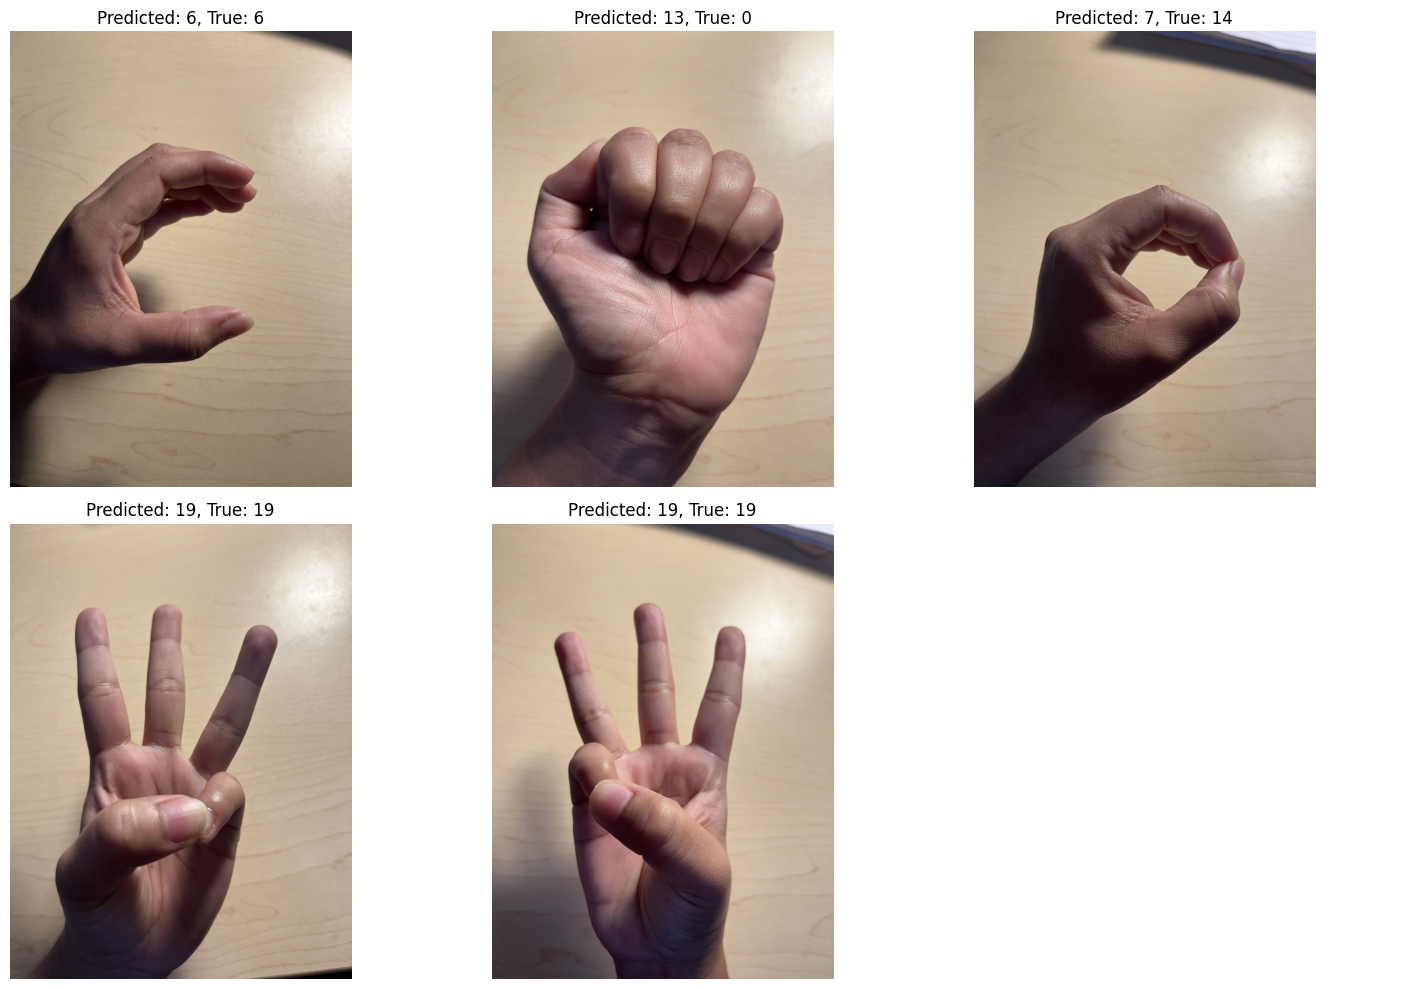

In [27]:
import matplotlib.pyplot as plt
import math

def predict_and_show_images_grid(model, image_paths, true_labels=None, grid_cols=3):
    """
    Predict and display multiple images with their predicted labels in a grid.
    
    Parameters:
    - model: The trained CustomLogisticRegression model
    - image_paths: List of image file paths
    - true_labels: List of true labels (optional, same length as image_paths)
    - grid_cols: Number of columns in the grid (default: 3)
    """
    num_images = len(image_paths)
    grid_rows = math.ceil(num_images / grid_cols)  # Calculate required rows
    
    # Create a Matplotlib figure
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 5 * grid_rows))
    axes = axes.flatten()  # Flatten in case of single row/column grids
    
    for i, image_path in enumerate(image_paths):
        # Predict the label for the image
        predicted_label = predict_image(model, image_path)
        
        # Get the true label if provided
        true_label = true_labels[i] if true_labels else None
        
        # Load the image
        img = Image.open(image_path)
        
        # Display the image in the current grid cell
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        title = f"Predicted: {predicted_label}"
        if true_label is not None:
            title += f", True: {true_label}"
        axes[i].set_title(title)
    
    # Turn off remaining empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example Usage:
image_paths = [
    './archive/validation_images/IMG_7864.png',
    './archive/validation_images/IMG_7865.png',
    './archive/validation_images/IMG_7866.png',
    './archive/validation_images/IMG_7867.png',
    './archive/validation_images/IMG_7868.png'
]

# Replace this list with the actual true labels if you have them
true_labels = [6, 0, 14, 19, 19]  # Example true labels

# Call the function to predict and display 
predict_and_show_images_grid(clf, image_paths, true_labels, grid_cols=3)


Class 10: 100.00%
Class 0: 97.58%
Class 14: 93.37%
Class 4: 87.35%
Class 15: 85.37%
Class 2: 85.16%
Class 5: 81.38%
Class 1: 80.79%
Class 7: 79.82%
Class 8: 65.97%
Class 3: 62.45%
Class 22: 62.17%
Class 21: 59.71%
Class 6: 58.33%
Class 13: 56.10%
Class 9: 48.04%
Class 12: 47.77%
Class 23: 45.48%
Class 18: 41.94%
Class 20: 37.86%
Class 11: 34.26%
Class 19: 30.08%
Class 16: 28.47%
Class 17: 17.48%


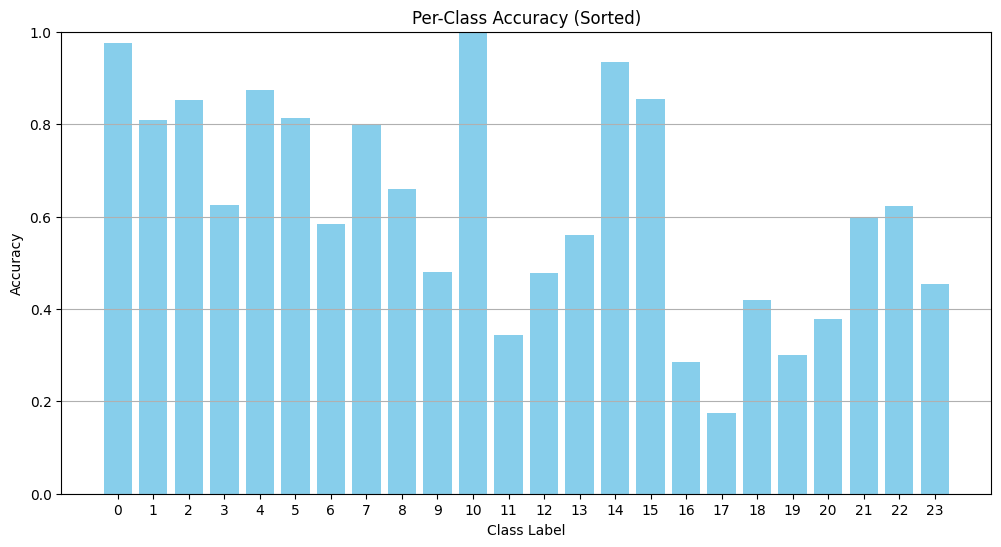

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_sort_per_class_accuracy(y_true, y_pred):
    """
    Compute and sort per-class accuracy using a confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    
    Returns:
    - Sorted dictionary with per-class accuracy
    """
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Per-class accuracy
    per_class_accuracy = {}
    for i in range(len(conf_matrix)):
        correct = conf_matrix[i, i]  # Diagonal element (true positive for class i)
        total = conf_matrix[i, :].sum()  # Total samples of class i
        per_class_accuracy[i] = correct / total if total > 0 else 0.0
    
    # Sort by accuracy
    sorted_accuracy = dict(sorted(per_class_accuracy.items(), key=lambda item: item[1], reverse=True))
    return sorted_accuracy

def plot_sorted_per_class_accuracy(sorted_accuracy):
    """
    Plot sorted per-class accuracy as a bar chart.
    
    Parameters:
    - sorted_accuracy: Sorted dictionary of per-class accuracies
    """
    labels = list(sorted_accuracy.keys())
    accuracies = list(sorted_accuracy.values())
    
    plt.figure(figsize=(12, 6))
    plt.bar(labels, accuracies, color='skyblue')
    plt.xlabel("Class Label")
    plt.ylabel("Accuracy")
    plt.title("Per-Class Accuracy (Sorted)")
    plt.xticks(labels)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

# Example Usage:
# Assuming y_test contains true labels and y_pred contains predicted labels
y_pred = clf.predict(X_test)  # Replace with your model's predictions

# Compute and sort per-class accuracy
sorted_per_class_accuracy = evaluate_and_sort_per_class_accuracy(y_test, y_pred)

# Display sorted per-class accuracy
for label, accuracy in sorted_per_class_accuracy.items():
    print(f"Class {label}: {accuracy * 100:.2f}%")

# Plot the sorted per-class accuracy
plot_sorted_per_class_accuracy(sorted_per_class_accuracy)
